# TP2 SD204 Louis PETITJEAN

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stat
from scipy.stats import norm

from sklearn import linear_model as lm

import seaborn


In [199]:
# Change here using YOUR own first and last names
fn1 = "louis"
ln1 = "petitjean"
filename = "_".join(map(lambda s: s.strip().lower(),
["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

### Question 1

In [200]:
df = pd.read_csv("data_dm3.csv", sep=',', header = None)
#df.columns = ["X" + str(i) for i in range(len(df[1]))]
X = df.iloc[: , :-1]
df

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,-0.270323,-0.437638,0.347423,-0.123436,0.344168,-0.777434,-1.380455,0.491346,0.713854,-0.693186,...,-0.051364,-0.371945,-0.114830,0.153832,-0.973347,-0.997793,0.158006,-0.139519,1.010518,178.0
438,0.872196,0.975497,0.819331,-0.975557,-0.968388,1.029983,-0.079420,-0.130714,0.201144,-2.390860,...,-0.327924,0.350886,-0.305686,-1.292688,0.124676,1.465920,0.663206,1.278693,0.419890,104.0
439,-0.032586,-0.571893,0.806842,0.562865,1.194239,-0.345469,0.717316,0.234458,1.546961,0.554013,...,-1.467585,0.584516,-0.281854,-0.618165,0.840381,1.261452,-0.084541,0.301755,0.517624,132.0
440,-1.529754,0.756967,2.251588,-0.052600,0.502047,0.046229,-1.571494,0.238793,-1.211869,-0.896148,...,-0.000023,-2.231379,-0.880398,0.267481,1.036171,-0.962587,0.491072,-1.389069,0.473725,220.0


In [201]:
### Calcul of the mean and of the covariates

stats = X.describe()
stats[1:4]


,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
mean,2.411344e-17,-2.310871e-17,1.210382e-17,-1.054963e-17,1.632681e-17,-2.310871e-17,2.474140e-17,2.662526e-17,2.511817e-18,-1.004727e-17,...,2.034572e-17,-7.786632e-18,-3.591898e-17,7.535450e-18,-2.122485e-17,1.004727e-18,1.858744e-17,-2.511817e-19,-1.306145e-17,8.037814e-18
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,...,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00
min,-3.149247e+00,-2.862871e+00,-3.057543e+00,-2.856903e+00,-3.102347e+00,-2.782344e+00,-2.825318e+00,-3.626525e+00,-2.834007e+00,-2.695861e+00,...,-3.436711e+00,-3.059475e+00,-3.206539e+00,-2.585325e+00,-3.561763e+00,-3.167962e+00,-2.751207e+00,-3.028940e+00,-2.675447e+00,-2.918321e+00


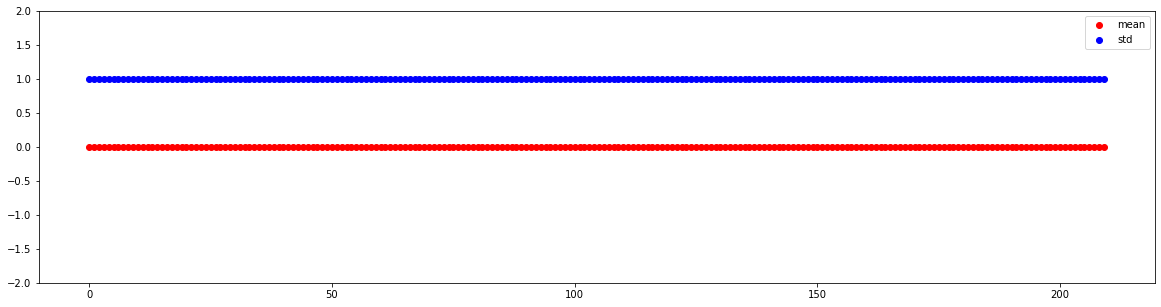

In [202]:
fig = plt.figure(figsize=(20, 5))
plt.scatter(X.columns, stats[1:2], color='red', label="mean")
plt.scatter(X.columns, stats[2:3], color='blue', label="std")

plt.ylim((-2, 2))
plt.legend()

We can consider that the data is centered as the mean of each covariates is not significant. 
We can also consider that the data is standarized as the standard of each covariate is approximately equal to 1. 
Finaly, as the data is not in [0,1] it is not normalized.

In [203]:
### Definition of X and Y, the input and the output of our data

X = df.iloc[: , :-1] # input
Y = df[210] # output

### Train and test set

X = X.to_numpy() # it's easier to work with numpy list for the rest 
Y = Y.to_numpy()

print(X.shape)

split = int(X.shape[0] * 0.75) # we fix our coefficient of split as 0.75

Xtrain = X[:split]
Xtest = X[split:]
Ytrain = Y[:split]
Ytest = Y[split:]

(442, 210)


In [204]:
### Centering the train and test set

from sklearn.preprocessing import StandardScaler


# We have to remove the same mean for the train set and the set test
scaler = StandardScaler()

Xtrain = scaler.fit_transform(Xtrain)
Xtest =  scaler.transform(Xtest)


In [205]:
### Creation of the two empty dataset

df_test = pd.DataFrame()
df_coef = pd.DataFrame()

### Question 2

In [206]:
### Compute the determinent coefficient

def Rsqr(Ytrue, Ypred):
    
    num = np.sum((Ytrue - Ypred)**2)
    den = np.sum((Ytrue-Ytrue.mean(axis=0))**2)
    
    return(1-num/den)

def mse(Ytrue, Ypred):
    
    mse = np.sum((Ytrue - Ypred)**2)/len(Ytrue)
    
    return(mse)
    


### Question 3

In [207]:
### Linear regression with sklearn

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(Xtrain, Ytrain)

Ypred = reg.predict(Xtest)

R2 = Rsqr(Ytrain, reg.predict(Xtrain)) 
MSE = mse(Ytest, Ypred)

print("R²= " + str(R2))
print("mse= " + str(MSE))

R²= 0.44363256235732396
mse= 4896.102153980337


In [208]:
### Add column OLS
Ypred = reg.predict(Xtest)

df_test['OLS'] = Ypred
df_coef['OLS'] = reg.coef_

### Question 4

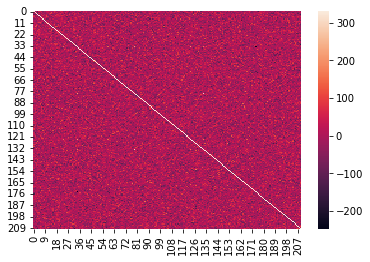

In [209]:
### Plot the Heat Map of the covariance matrix

import seaborn as sns


cov = Xtrain.T @ Xtrain # Covariance matrix of a centered variable
sns.heatmap(cov) # heat map thanks to seaborn
plt.show() 


In [210]:
### Compute the svd decomposition of the covariance matrix

U, S, V = np.linalg.svd(cov, full_matrices=True)
s =np.diag(S)

### Question 5

In [211]:
from scipy.sparse.linalg import eigsh

n = len(X)

UX, SX, VX = np.linalg.svd(X, full_matrices=True)

### Compute the eigen values
eigenvalues, eigenvectors = eigsh(np.multiply(1/(n-1), np.transpose(X)@X), k=n)
SX = np.sort(SX)

L = eigenvalues - np.multiply(1/(n-1), np.multiply(SX, SX))

np.mean(L)

C:\Users\louis\anaconda3\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1593: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


-2.9927118295348604e-17

On obtient une liste L très satisfaisante, la moyenne est très faible et toutes les valeurs le sont aussi. On peut donc conclure qu'il y a égualité. 

### Question 6

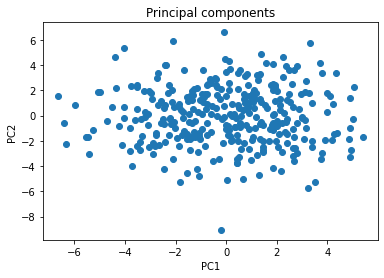

In [212]:
### Compute the PCs

PC = np.dot(Xtrain,U)

plt.scatter(PC[:, 0], PC[:, 1])

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Principal components")
plt.show()

### Question 7

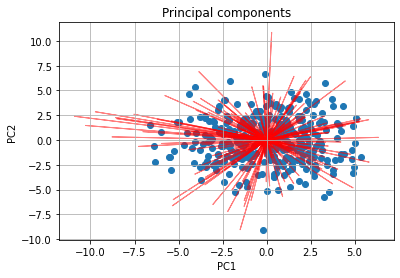

In [216]:
PC = np.dot(Xtrain,U)

plt.scatter(PC[:, 0], PC[:, 1])

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Principal components")

loadings = np.dot(U, s**0.5)

for i in range(X.shape[1]):
    plt.arrow(0, 0, loadings[i,0], loadings[i,1], color='red',alpha=0.5)

plt.grid()
plt.show()

### Question 8

In [217]:
### Compute projected data for both the train and the test data
Xtrain_pca = np.dot(Xtrain,U)[:, :2]
Xtest_pca = np.dot(Xtest,U)[:, :2]

### apply the linear regression of the sklearn library to the low dimensional data

reg_pca = LinearRegression().fit(Xtrain_pca, Ytrain)

Ypred_pca = reg_pca.predict(Xtest_pca)

### print the determination coefficient and the MSE of the test data

R2 = Rsqr(Ytrain, reg_pca.predict(Xtrain_pca)) 
MSE = mse(Ytest, Ypred_pca)

print("R²= " + str(R2))
print("mse= " + str(MSE))



R²= 0.10145604623199567
mse= 5366.402088863538


In [218]:
###add a column named pca_ols to the df_test dataframe that contains the predicted valuesfor the test sample

df_test['pca_ols'] = Ypred_pca

## Regularisation

### Question 9: Lasso

In [219]:
### Compute the LassoCv regression

from sklearn.linear_model import LassoCV

alpha_list = np.logspace(-3, 1, num=30)

regLasso = LassoCV(cv=5, alphas = alpha_list).fit(Xtrain, Ytrain)

YpredLasso = regLasso.predict(Xtest)

R2 = Rsqr(Ytrain, regLasso.predict(Xtrain)) 
MSE = mse(Ytest, YpredLasso)

print("R²= " + str(R2))
print("mse= " + str(MSE))
print("Alpha selected :", regLasso.alpha_)

R²= 0.5069516165465723
mse= 3149.5632588970743
Alpha selected : 5.298316906283707


In [220]:
### Add column in our two dataframes

df_test['Lasso'] = YpredLasso
df_coef['Lasso'] = regLasso.coef_

### Question 10: Ridge

In [221]:
from sklearn.linear_model import RidgeCV

alpha_list = np.logspace(-1, 2, 30)

regRidge = RidgeCV(alphas=alpha_list).fit(Xtrain, Ytrain)

YpredRidge = regRidge.predict(Xtest)

R2 = Rsqr(Ytrain, regLasso.predict(Xtrain)) 
MSE = mse(Ytest, YpredRidge)

print("R²= " + str(R2))
print("mse= " + str(MSE))
print("Alpha selected :", regRidge.alpha_)

R²= 0.5069516165465723
mse= 3654.9655161435817
Alpha selected : 78.80462815669912


In [222]:
df_test['Ridge'] = YpredRidge
df_coef['Ridge'] = regRidge.coef_

### Question 11

In [223]:
def forward_variable_selection(X,Y):

    n,m = X.shape
    test = np.zeros((m, m))
    pval_res,pval = np.ones(m),np.ones((m, m))
    rest = Y
    S = []
    R = list(range(m)) 

    for i in range(m):
        rest_res = np.zeros((m, n))
        for elt in R:
            tmp = pd.DataFrame(X.iloc[:,elt]) 
            reg = LinearRegression().fit(tmp, rest)
            theta = reg.coef_
            tmp_calcul = theta*tmp[X.columns[elt]]
            gram_matrix = np.sum(tmp**2)/n
            sigma2 = (np.linalg.norm(rest - tmp_calcul)**2)/(n-2)
            rest_res[elt, : ] = tmp_calcul
            Sn = 1/gram_matrix
            
            test[i, elt] = np.sqrt(n) * np.abs(theta) / (np.sqrt(sigma2)*Sn)
            pval[i, elt] = 2 * (1 - norm.cdf(test[i, elt]))
        
        best_var = np.argmax(test[i, :])
        S.append(best_var)
        rest = rest_res[best_var, :] - rest
        pval_res[i] = pval[i, best_var]
        R = np.setdiff1d(R, S)
    return S

In [224]:
df = pd.read_csv("data_dm3.csv", sep=',', header = None)
#df.columns = ["X" + str(i) for i in range(len(df[1]))]
Xdf = df.iloc[: , :-1]
Ydf = df[210] 

print(forward_variable_selection(Xdf, Ydf))



[58, 123, 133, 167, 129, 31, 13, 5, 135, 183, 208, 174, 85, 45, 184, 130, 29, 19, 35, 28, 97, 95, 93, 190, 115, 4, 120, 18, 99, 34, 79, 49, 131, 206, 150, 164, 116, 194, 110, 142, 121, 75, 201, 77, 40, 118, 92, 159, 7, 68, 59, 10, 11, 185, 50, 188, 74, 39, 146, 6, 9, 38, 160, 140, 162, 180, 73, 119, 189, 37, 209, 67, 172, 193, 141, 16, 89, 203, 112, 165, 192, 157, 3, 148, 179, 65, 198, 76, 182, 91, 103, 104, 14, 42, 83, 134, 138, 60, 202, 98, 181, 44, 191, 41, 199, 108, 100, 153, 72, 20, 170, 32, 147, 1, 107, 90, 128, 154, 86, 168, 196, 69, 176, 178, 15, 144, 125, 12, 156, 96, 113, 46, 52, 54, 78, 84, 136, 64, 132, 207, 66, 175, 171, 105, 23, 30, 53, 61, 124, 2, 114, 155, 149, 102, 88, 117, 200, 173, 26, 62, 63, 137, 109, 0, 158, 56, 101, 186, 24, 94, 127, 82, 169, 204, 87, 36, 80, 71, 151, 106, 145, 81, 122, 47, 187, 17, 43, 139, 8, 152, 177, 205, 166, 51, 197, 195, 143, 70, 126, 161, 25, 48, 27, 111, 57, 163, 33, 21, 55, 22]


### Question 12

In [225]:
def forward_variable_selection(X,Y):

    n,m = X.shape
    test = np.zeros((m, m))
    pval_res,pval = np.ones(m),np.ones((m, m))
    rest = Y
    S = []
    R = list(range(m)) 
    
    i=0
    while i < 210:
        rest_res = np.zeros((m, n))
        for elt in R:
            tmp = pd.DataFrame(X.iloc[:,elt]) 
            reg = LinearRegression().fit(tmp, rest)
            theta = reg.coef_
            tmp_calcul = theta*tmp[X.columns[elt]]
            gram_matrix = np.sum(tmp**2)/n
            sigma2 = (np.linalg.norm(rest - tmp_calcul)**2)/(n-2)
            rest_res[elt, : ] = tmp_calcul
            Sn = 1/gram_matrix
            
            test[i, elt] = np.sqrt(n) * np.abs(theta) / (np.sqrt(sigma2)*Sn)
            pval[i, elt] = 2 * (1 - norm.cdf(test[i, elt]))
        
        
        best_var = np.argmax(test[i, :])
        
        if pval[i, best_var] < 0.05: 
            S.append(best_var)
            rest = rest_res[best_var, :] - rest
            pval_res[i] = pval[i, best_var]
            R = np.setdiff1d(R, S)
            
        i+=1
    return S

In [226]:
df = pd.read_csv("data_dm3.csv", sep=',', header = None)
#df.columns = ["X" + str(i) for i in range(len(df[1]))]
Xdf = df.iloc[: , :-1]
Ydf = df[210] 

print(forward_variable_selection(Xdf, Ydf))

[58, 123]


In [227]:
## As we don't manage to select the 50 first p-values, we only take the 50 first ones of the list we got in question 11

L =[58, 123, 133, 167, 129, 31, 13, 5, 135, 183, 208, 174, 85, 45, 184, 130, 29, 19, 35, 28, 97, 95, 93, 190, 115, 4, 120, 18, 99, 34, 79, 49, 131, 206, 150, 164, 116, 194, 110, 142, 121, 75, 201, 77, 40, 118, 92, 159, 7, 68, 59, 10, 11, 185, 50, 188, 74, 39, 146, 6, 9, 38, 160, 140, 162, 180, 73, 119, 189, 37, 209, 67, 172, 193, 141, 16, 89, 203, 112, 165, 192, 157, 3, 148, 179, 65, 198, 76, 182, 91, 103, 104, 14, 42, 83, 134, 138, 60, 202, 98, 181, 44, 191, 41, 199, 108, 100, 153, 72, 20, 170, 32, 147, 1, 107, 90, 128, 154, 86, 168, 196, 69, 176, 178, 15, 144, 125, 12, 156, 96, 113, 46, 52, 54, 78, 84, 136, 64, 132, 207, 66, 175, 171, 105, 23, 30, 53, 61, 124, 2, 114, 155, 149, 102, 88, 117, 200, 173, 26, 62, 63, 137, 109, 0, 158, 56, 101, 186, 24, 94, 127, 82, 169, 204, 87, 36, 80, 71, 151, 106, 145, 81, 122, 47, 187, 17, 43, 139, 8, 152, 177, 205, 166, 51, 197, 195, 143, 70, 126, 161, 25, 48, 27, 111, 57, 163, 33, 21, 55, 22]

values_list = L[:50]
print(values_list)

[58, 123, 133, 167, 129, 31, 13, 5, 135, 183, 208, 174, 85, 45, 184, 130, 29, 19, 35, 28, 97, 95, 93, 190, 115, 4, 120, 18, 99, 34, 79, 49, 131, 206, 150, 164, 116, 194, 110, 142, 121, 75, 201, 77, 40, 118, 92, 159, 7, 68]


### Question 13: OLS

In [228]:
X = X[:, values_list]
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(Xtrain, Ytrain)

YpredOLS = reg.predict(Xtest)

R2 = Rsqr(Ytrain, regLasso.predict(Xtrain)) 
MSE = mse(Ytest, YpredOLS)

print("R²= " + str(R2))
print("mse= " + str(MSE))

R²= 0.5069516165465723
mse= 4896.102153980337


In [229]:
# Compute the fvs coefficient

FVS_coef = np.zeros((210,))
c=0
for i in values_list:
    FVS_coef[i] = reg.coef_.T[c]
    c+=1

df_test['FVS'] = YpredOLS
df_coef['FVS'] = FVS_coef

## Comparaison 

### Question 14

In [230]:
df_coef

,OLS,Lasso,Ridge,FVS
0,3.106767e+14,0.000000,0.400171,0.000000e+00
1,2.962772e+15,0.000000,0.687670,0.000000e+00
2,-3.088197e+14,-0.000000,-0.067538,0.000000e+00
3,2.576846e+15,-0.000000,-0.179780,0.000000e+00
4,-2.090574e+14,-0.000000,-1.410378,-1.447804e+15
...,...,...,...,...
205,-1.441787e+15,0.000000,0.704102,0.000000e+00
206,8.148687e+14,-0.000000,-1.237901,4.625809e+15
207,-1.508166e+15,0.000000,-0.338687,0.000000e+00
208,1.853756e+15,0.730797,1.591225,2.871200e+15


Text(0.5, 1.0, 'Coefficients for FVS before OLS')

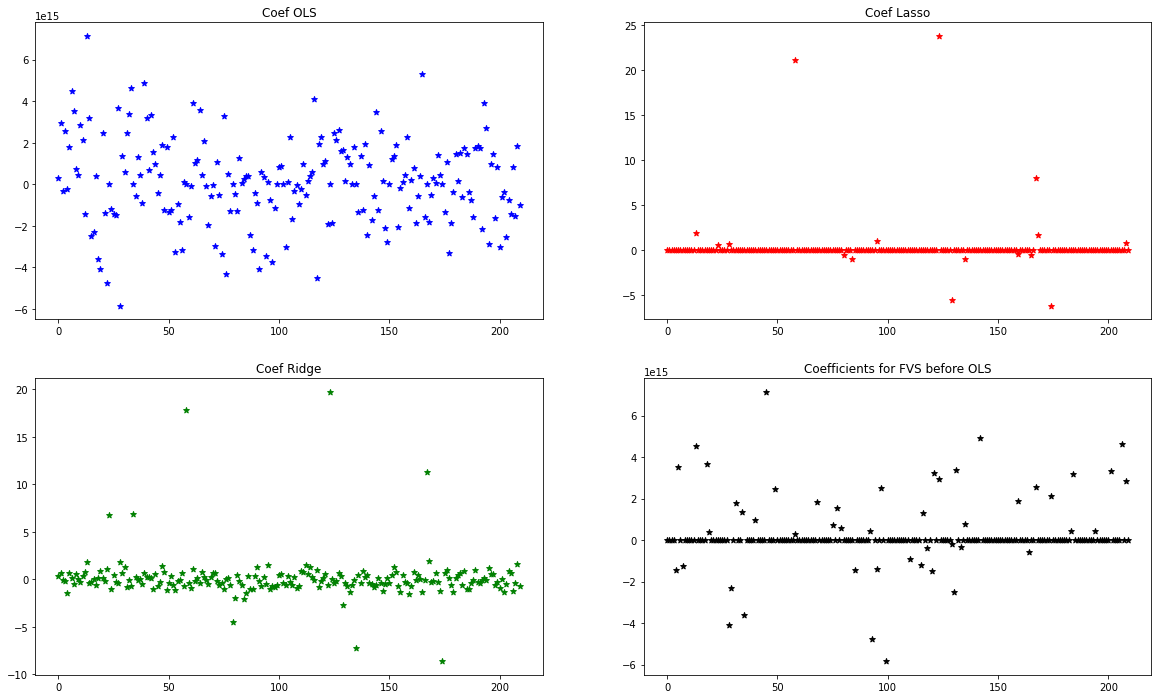

In [231]:
### Nous allons tracer les coeffs pourchacune des méthodes

fig, axis = plt.subplots(2, 2, figsize=(20, 12))
axis = axis.ravel()
abscisse = np.arange(Xtrain.shape[1])

axis[0].scatter(abscisse, df_coef['OLS'], c='blue', marker='*')
axis[0].set_title("Coef OLS")

axis[1].scatter(abscisse, df_coef['Lasso'], c='red', marker='*')
axis[1].set_title("Coef Lasso")

axis[2].scatter(abscisse, df_coef['Ridge'], c='green', marker='*')
axis[2].set_title("Coef Ridge")

axis[3].scatter(abscisse, df_coef['FVS'], c='black', marker='*')
axis[3].set_title("Coefficients for FVS before OLS")


### Question 15

In [232]:
### Let us count how many zerosare there for each coef

Count = np.zeros(4)
for i in range(Xtrain.shape[1]):
    
    if np.abs(df_coef['OLS'][i]) ==0: ## we consider that it's equal to 0 when inforior to O.1
        Count[0] += 1
        
    if np.abs(df_coef['Lasso'][i]) ==0: ## we consider that it's equal to 0 when inforior to O.1
        Count[1] += 1
        
    if np.abs(df_coef['Ridge'][i]) ==0: ## we consider that it's equal to 0 when inforior to O.1
        Count[2] += 1
        
    if np.abs(df_coef['FVS'][i]) ==0: ## we consider that it's equal to 0 when inforior to O.1
        Count[3] += 1
print(Count)

[  0. 194.   0. 160.]


In the Lasso method, we have the formula seen in TD that shows what is the argmin of the function used for lasso. The minimum is obtained for 0. That's the reason why there are so many zeros.

On the other hand, for the ridge, because it's a norm2, every value is allowed.

### Question 16

In [233]:
df_test

,OLS,pca_ols,Lasso,Ridge,FVS
0,122.496053,146.950032,118.901314,126.003682,122.496053
1,269.246053,162.479384,246.294208,258.729737,269.246053
2,216.902303,157.457323,178.656737,200.008824,216.902303
3,108.246053,139.072922,113.575302,135.884230,108.246053
4,37.246053,128.573484,87.214480,63.584634,37.246053
...,...,...,...,...,...
106,149.246053,173.459012,190.991062,180.439506,149.246053
107,128.496053,152.444935,125.063957,127.831294,128.496053
108,133.683553,162.898499,121.801235,112.385945,133.683553
109,161.183553,182.272617,194.068112,212.136061,161.183553


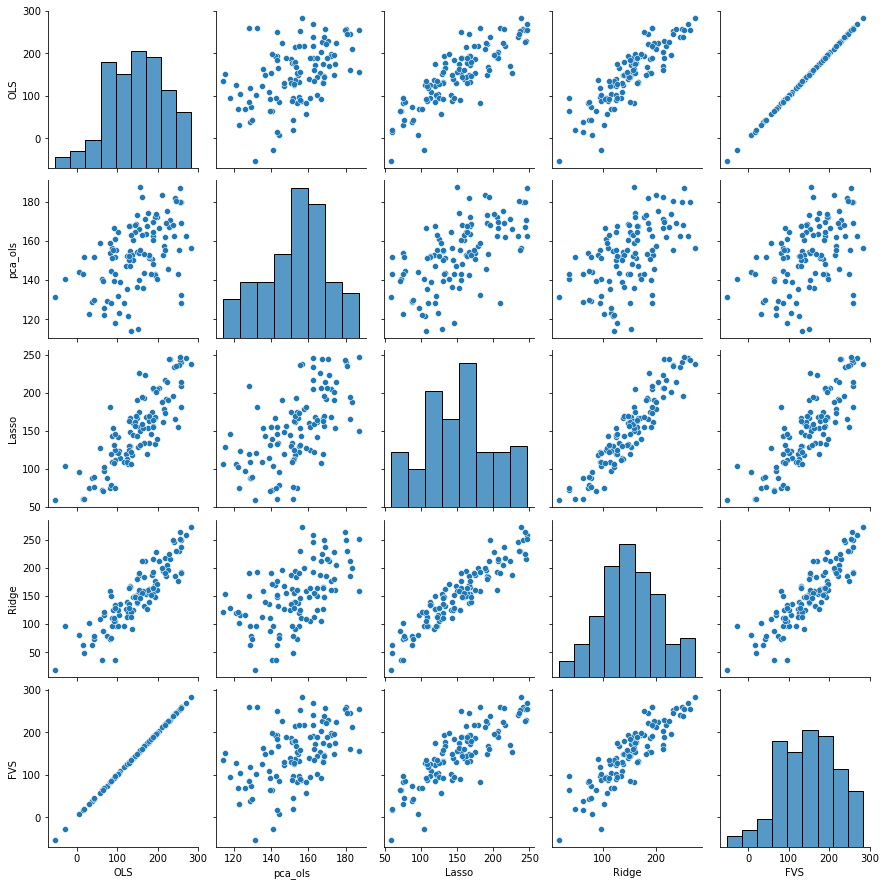

In [234]:
sns.pairplot(df_test)

### Question 17